In [56]:
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

from textblob import TextBlob
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import shapiro

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m.pham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m.pham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\m.pham\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [57]:
# Read the dataset
df = pd.read_csv("clean_data.csv")

In [58]:
df.head()

,ID,date_review,day_review,month_review,month_review_num,year_review,verified,name,month_fly,month_fly_num,...,seat_type,route,seat_comfort,cabit_serv,food,ground_service,wifi,money_value,recommended,review
0,0,2024-03-02,2,March,3,2024,True,T Collins,February,2.0,...,Business Class,Heathrow to Oslo,4.0,5.0,5.0,5.0,NaN,5,yes,I upgraded at check in to Club Europe seat 1D ...
1,1,2024-03-01,1,March,3,2024,True,Armando Castro,June,6.0,...,Economy Class,Sydney to Porto via Singapore / London,NaN,NaN,NaN,NaN,NaN,1,no,"I bought a return trip with BA, through Webjet..."
2,2,2024-02-29,29,February,2,2024,True,Simon Channon,February,2.0,...,Economy Class,London Heathrow to Lisbon,1.0,3.0,1.0,2.0,NaN,3,no,Poor from start to finish. Six months after pu...
3,3,2024-02-29,29,February,2,2024,True,C Allen,February,2.0,...,Premium Economy,Madrid to London via Buenos Aires,1.0,3.0,NaN,1.0,NaN,1,no,Communication and customer service non existen...
4,4,2024-02-23,23,February,2,2024,True,Peter Hansell,September,9.0,...,Economy Class,Pisa to London Heathrow,NaN,NaN,NaN,NaN,NaN,1,no,That was supposed to be my flight but it was c...


In [59]:
df.columns

Index(['ID', 'date_review', 'day_review', 'month_review', 'month_review_num',
       'year_review', 'verified', 'name', 'month_fly', 'month_fly_num',
       'year_fly', 'month_year_fly', 'country', 'aircraft', 'type',
       'seat_type', 'route', 'seat_comfort', 'cabit_serv', 'food',
       'ground_service', 'wifi', 'money_value', 'recommended', 'review'],
      dtype='object')

In [60]:
df = df[['seat_comfort', 'cabit_serv', 'food','ground_service', 'wifi','review', 'money_value','recommended']]

In [61]:
df.head()

,seat_comfort,cabit_serv,food,ground_service,wifi,review,money_value,recommended
0,4.0,5.0,5.0,5.0,NaN,I upgraded at check in to Club Europe seat 1D ...,5,yes
1,NaN,NaN,NaN,NaN,NaN,"I bought a return trip with BA, through Webjet...",1,no
2,1.0,3.0,1.0,2.0,NaN,Poor from start to finish. Six months after pu...,3,no
3,1.0,3.0,NaN,1.0,NaN,Communication and customer service non existen...,1,no
4,NaN,NaN,NaN,NaN,NaN,That was supposed to be my flight but it was c...,1,no


## Word Frequency Analysis

### Negative Word Frequency Analysis

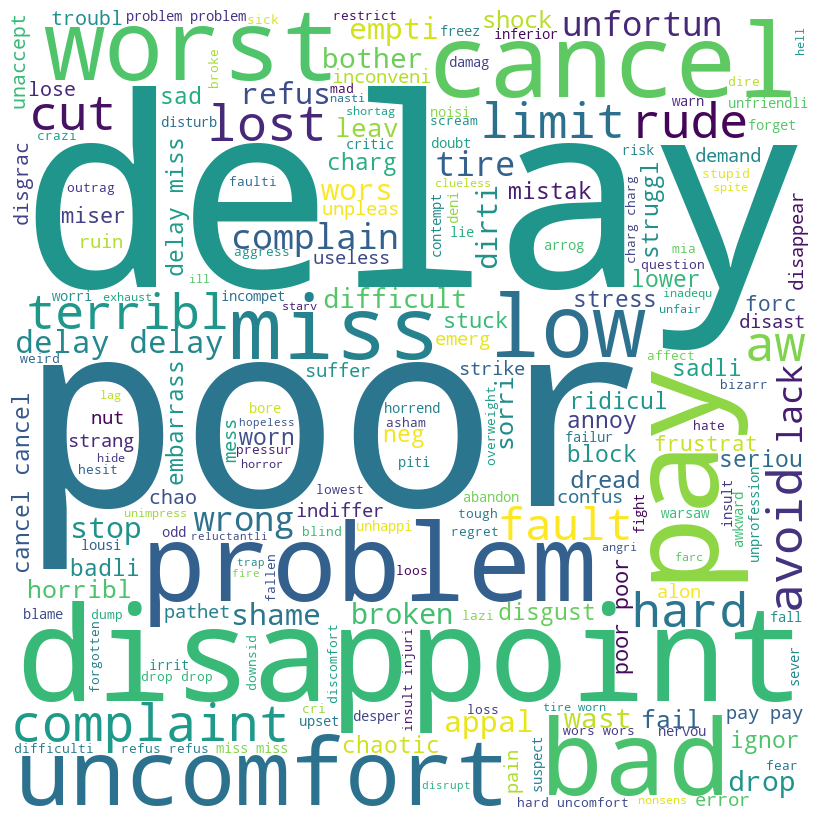

In [62]:
# Combine all reviews into a single string
reviews_text = ' '.join(df['review'].dropna())

# Tokenize the text
tokens = word_tokenize(reviews_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Perform sentiment analysis to identify negative words
sid = SentimentIntensityAnalyzer()
negative_words = [word for word in filtered_tokens if sid.polarity_scores(word)['compound'] < 0]

# Initialize Porter Stemmer
stemmer = PorterStemmer()

# Example dictionary of similar words
word_groups = {
    'delayed': 'delay',
    'cancelled': 'cancel'
    # Add more groups as needed
}

# Update negative words based on groups and stemming
negative_words_grouped = []
for word in negative_words:
    # Stem the word using Porter Stemmer
    stemmed_word = stemmer.stem(word)
    
    # Check if the stemmed word is in the word groups
    for group_word, group_root in word_groups.items():
        if group_word in stemmed_word:
            stemmed_word = group_root
            break
    
    # Add the stemmed word to the grouped negative words
    negative_words_grouped.append(stemmed_word)

# Combine negative words into a single string
negative_text_grouped = ' '.join(negative_words_grouped)

# Create and generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate(negative_text_grouped)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()

           Word  Frequency
7         delay        886
3          poor        648
11          pay        475
16       cancel        442
49   disappoint        425
..          ...        ...
506     undecid          1
508       slash          1
275     hapless          1
267     nastier          1
629      grimac          1

[630 rows x 2 columns]


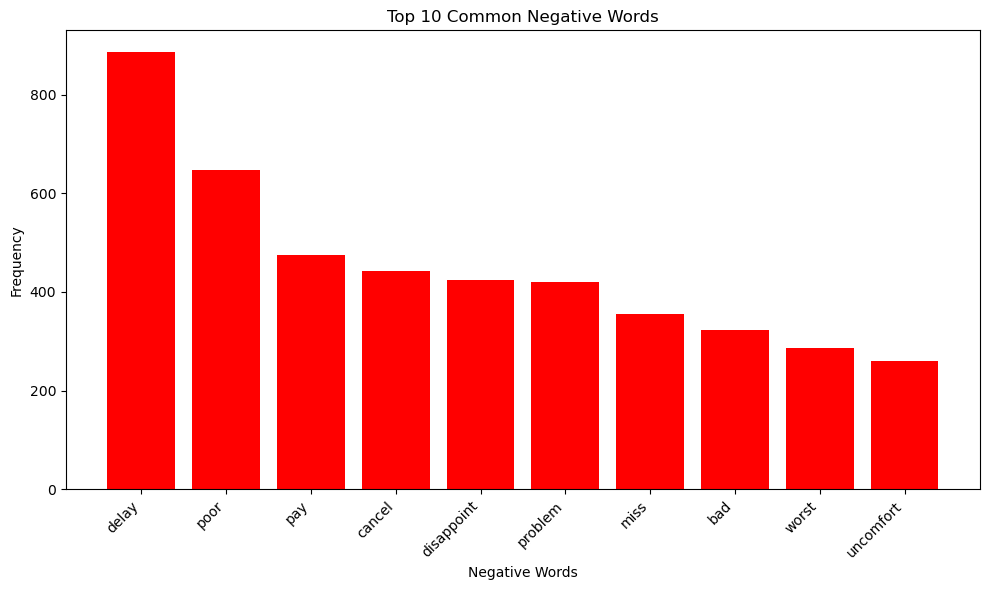

In [63]:
stemmer = PorterStemmer()

# Example dictionary of similar words
word_groups = {
    'delayed': 'delay',
    'cancelled': 'cancel'
    # Add more groups as needed
}

# Dictionary to store word frequencies
word_freq = {}

# Update word frequencies based on groups and stemming
for word in negative_words:
    # Stem the word using Porter Stemmer
    stemmed_word = stemmer.stem(word)
    
    # Check if the stemmed word is in the word groups
    for group_word, group_root in word_groups.items():
        if group_word in stemmed_word:
            stemmed_word = group_root
            break
    
    # Update word frequency dictionary
    word_freq[stemmed_word] = word_freq.get(stemmed_word, 0) + 1

# Create a DataFrame from the word frequency dictionary
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Print the list of common negative words and their occurrences
print(word_freq_df)

# Plot the occurrences using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Word'][:10], word_freq_df['Frequency'][:10], color='red')
plt.xlabel('Negative Words')
plt.ylabel('Frequency')
plt.title('Top 10 Common Negative Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [64]:
# Function to check if the review contains the word "delay" or "delayed"
def check_delay(review):
    if 'delay' in review.lower() or 'delayed' in review.lower():
        return 1
    else:
        return 0

# Apply the function to create the 'Delay' column
df['delay'] = df['review'].apply(check_delay)
# Calculate the percentage of flights that have been delayed and round to two decimal places
percentage_delayed = round((df['delay'].mean()) * 100, 2)

print("Percentage of flights that have been delayed:", percentage_delayed, "%")

Percentage of flights that have been delayed: 18.09 %


In [65]:
# Function to check if the review contains the word "cancel"
def check_cancel(review):
    if 'cancel' in review.lower():
        return 1
    else:
        return 0

# Apply the function to create the 'Cancel' column
df['cancel'] = df['review'].apply(check_cancel)
# Calculate the percentage of flights that have been canceled and round to two decimal places
percentage_canceled = round((df['cancel'].mean()) * 100, 2)
print("Percentage of flights that have been canceled:", percentage_canceled, "%")


Percentage of flights that have been canceled: 9.02 %


## Sentiment Analysis

In [66]:
# Define a function to calculate sentiment polarity using TextBlob
def calculate_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

In [67]:
# Apply the function to your review column
df['sentiment_score'] = df['review'].apply(calculate_sentiment)

In [68]:
df['sentiment_score'].describe()

count    3758.000000
mean        0.090564
std         0.179188
min        -0.766667
25%        -0.020946
50%         0.079611
75%         0.200516
max         0.800000
Name: sentiment_score, dtype: float64

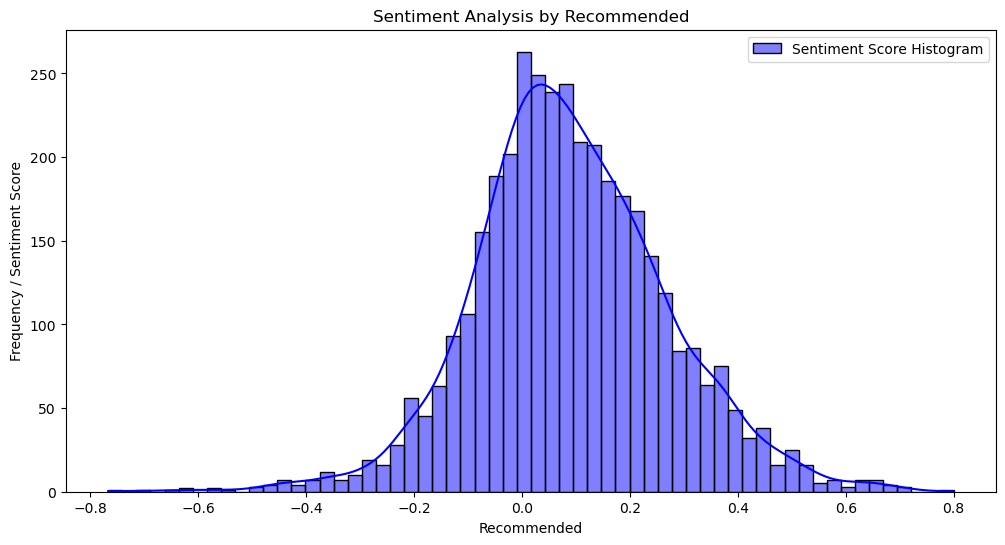

In [69]:
# Create a combo chart
plt.figure(figsize=(12, 6))

# Plot histogram with kernel density estimate
sns.histplot(df['sentiment_score'], bins=60, color='blue', kde=True, label='Sentiment Score Histogram')

plt.title('Sentiment Analysis by Recommended')
plt.xlabel('Recommended')
plt.ylabel('Frequency / Sentiment Score')
plt.legend()

plt.show()


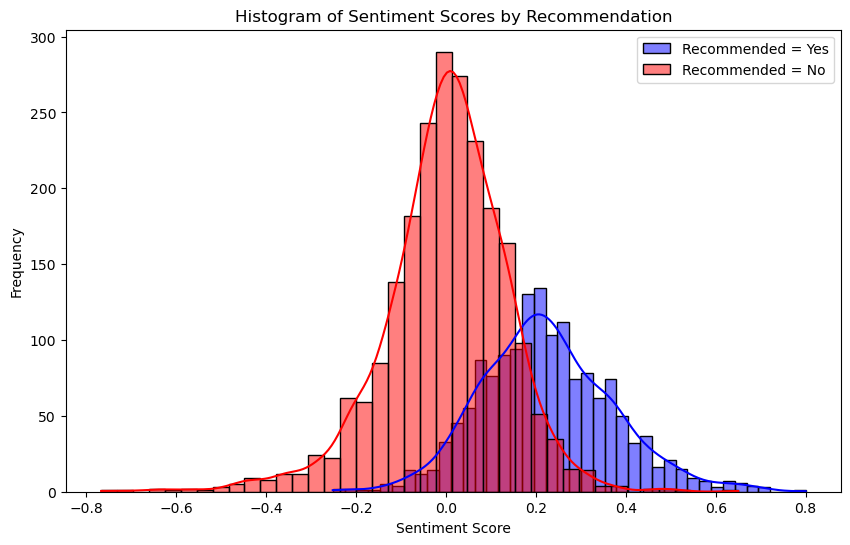

In [70]:
# Create histograms for sentiment scores based on 'Recommended' column
plt.figure(figsize=(10, 6))

sns.histplot(df[df['recommended'] == 'yes']['sentiment_score'], bins=40, color='blue', label='Recommended = Yes', kde=True)
sns.histplot(df[df['recommended'] == 'no']['sentiment_score'], bins=40, color='red', label='Recommended = No', kde=True)

plt.title('Histogram of Sentiment Scores by Recommendation')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [71]:
# Group sentiment score by Recommended column
grouped_data = df.groupby('recommended')['sentiment_score'].agg(['max', 'min', 'mean', 'median']).reset_index()
grouped_data

,recommended,max,min,mean,median
0,no,0.65,-0.766667,0.00042,0.007576
1,yes,0.80,-0.251667,0.22432,0.214167


In [72]:
df.head()

,seat_comfort,cabit_serv,food,ground_service,wifi,review,money_value,recommended,delay,cancel,sentiment_score
0,4.0,5.0,5.0,5.0,NaN,I upgraded at check in to Club Europe seat 1D ...,5,yes,0,0,0.694231
1,NaN,NaN,NaN,NaN,NaN,"I bought a return trip with BA, through Webjet...",1,no,0,0,0.137037
2,1.0,3.0,1.0,2.0,NaN,Poor from start to finish. Six months after pu...,3,no,1,0,-0.089286
3,1.0,3.0,NaN,1.0,NaN,Communication and customer service non existen...,1,no,0,0,0.000000
4,NaN,NaN,NaN,NaN,NaN,That was supposed to be my flight but it was c...,1,no,0,1,-0.047222


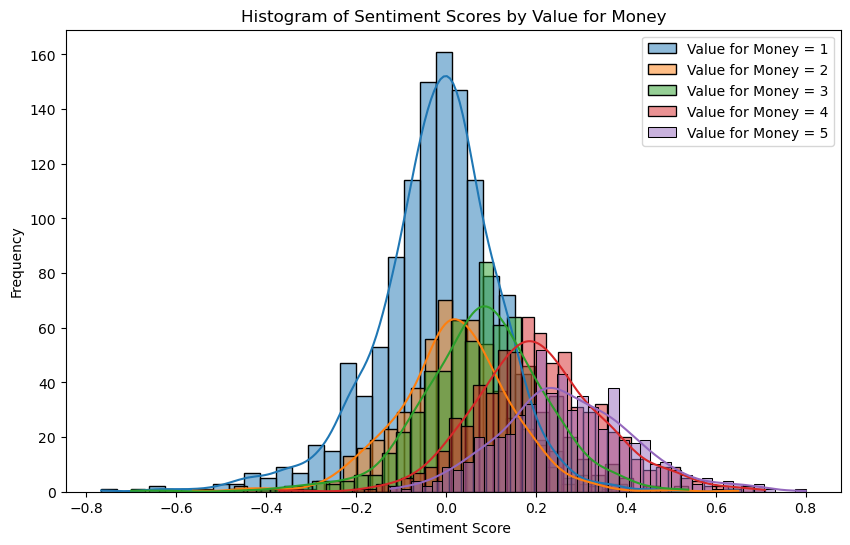

In [73]:
plt.figure(figsize=(10, 6))

# Plot histograms for 'Value for Money' scores
for value in range(1, 6):
    sns.histplot(df[df['money_value'] == value]['sentiment_score'], bins=40, label=f'Value for Money = {value}', kde=True)

plt.title('Histogram of Sentiment Scores by Value for Money')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [74]:
# Map 'yes' to 1 and 'no' to 0 in the 'Recommended' column
df['recommended'] = df['recommended'].map({'yes': 1, 'no': 0})

## Topic Modelling Analysis